In [44]:
import graph_fourier_transform
import graph_ruggedness_de
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import networkx as nx
import os
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.stats import spearmanr
import brownian_motion
import matplotlib as mpl

### Making KNN graph over His3p combinatorial dataset 
The below cell is run to make build to KNN graph for the gb1 combinatorial dataset. Note that the `approximate` method is used to find the `k` nearest neighbors due to the time complexity of an exact all vs. all search. 

In [66]:
df = pd.read_csv('../data_files/his3p//His3p_combinatorial.csv')
seq_ls = df['sequences'].tolist()
values = df['fitness'].tolist()
scaler = MinMaxScaler()
values = [val[0] for val in (scaler.fit_transform(np.array(values).reshape(-1,1)))]

G_k = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

Computing OHE dictionary.: 20it [00:00, 177349.01it/s]
Adding nodes to graph.: 0it [00:00, ?it/s]

Adding nodes to graph.: 2028it [00:00, 23886.68it/s]


### Sampling Dirichlet energies over subgraphs 
The below cell is run to sample the Dirichlet energy (approximate method due to comp. complexity) over subgraphs with random sampling proportions defined in `sampling_props` for replicates defined in `replicates`. This indicates how robust quantification of ruggedness via Dirichlet energy is to incomplete graphs. The Dirichlet energy is scaled by the ration between the square-root of the number of nodes in the full graph and the square root of the number of nodes in the sampled graph, as the energy is calculated over the number of edges.

In [67]:
sampling_props = np.linspace(0.1, 0.9, 10)
replicates = 1

#Netowork graph dicts
graph_sampl_repl_dict = {}
prior_arr_sampl_repl_dict = {}


#Iterate through sampling proportions.
for sampling_prop in sampling_props:
    
    #Iterate through replicates.
    for replicate in range(replicates):

        try:
            G_sampled, sampled_nodes, sampled_values = graph_ruggedness_de.sample_graph(G=G_k,
                                                                                        sample_size=sampling_prop)

            graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_sampled,
                                                        k=int(np.sqrt(G_sampled.number_of_nodes())))
        
            
            #Save to dict.
            graph_sampl_repl_dict[(sampling_prop, replicate)] = G_sampled
            
            prior_arr = brownian_motion.sample_prior_dist(G=G_sampled,
                                                          #sample_size=0.2, ###REDUCING MASKING PROPORTION
                                                          ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy_approximate)
            
            #Save to dict.
            prior_arr_sampl_repl_dict[(sampling_prop, replicate)] = prior_arr
            

        except:
            continue

Building approx. NN index.
Done.


Adding OHE vectors to index.: 202it [00:00, 3304.75it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 202it [00:00, 64695.28it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1753624.76it/s]
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1671484.72it/s]
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1708751.16it/s]
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1736020.81it/s]
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1747717.24it/s]
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1671484.72it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:125: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1664882.95it/s]
Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 1721838.35it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 383it [00:00, 4225.42it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 383it [00:00, 20029.41it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1817691.22it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1731331.14it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1828690.29it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1832897.25it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1789849.53it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1798296.54it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1792045.44it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1844858.06it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1796637.60it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 1799034.84it/s]
Computing pairwise s

Building approx. NN index.
Done.


Adding OHE vectors to index.: 563it [00:00, 4648.98it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 563it [00:00, 25933.99it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1816994.80it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1798820.60it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1677813.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1705920.95it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1639965.71it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1685168.33it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1653901.09it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1470222.16it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1332898.62it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1528461.08it/s]
Computing pairwise s

Building approx. NN index.
Done.


Adding OHE vectors to index.: 743it [00:00, 3038.91it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 743it [00:00, 49599.21it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1803033.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1771462.05it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1679043.33it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1714154.70it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1563785.35it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1550036.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1670445.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1170453.44it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1644720.73it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1598609.12it/s]
Computing 

Building approx. NN index.
Done.


Adding OHE vectors to index.: 923it [00:00, 4562.35it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 923it [00:00, 48367.60it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1811019.97it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1768658.85it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1795069.93it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1803938.57it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1732883.48it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1765777.25it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1767559.99it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1795211.52it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1770447.41it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1804510.67it/s]
Computing 

Building approx. NN index.
Done.


Adding OHE vectors to index.: 1104it [00:00, 4594.70it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1104it [00:00, 47827.46it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1848623.01it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1767022.48it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1881114.37it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1852400.25it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1824585.55it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1882416.34it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1823721.93it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1826748.19it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1869666.19it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1850843.05it/s]
Computing 

Building approx. NN index.
Done.


Adding OHE vectors to index.: 1284it [00:00, 4622.47it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1284it [00:00, 47720.41it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1821713.68it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1818723.61it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1389905.42it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1850775.15it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1851911.43it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1809510.43it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1835912.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1845585.01it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1795300.24it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1724398.24it/s]
Computing 

Building approx. NN index.
Done.


Adding OHE vectors to index.: 1464it [00:00, 4608.39it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1464it [00:00, 45210.29it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1886496.93it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1805577.41it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1823142.02it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1819289.22it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1856574.62it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1862872.92it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1852759.44it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1823540.66it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1828488.26it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1857401.59it/s]
Computing 

Building approx. NN index.
Done.


Adding OHE vectors to index.: 1644it [00:00, 4598.28it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1644it [00:00, 41727.04it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1848054.83it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1812843.67it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1839707.98it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1817410.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1820947.99it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1825203.36it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1839266.34it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1832416.54it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1854765.65it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1852501.97it/s]
Computing 

Building approx. NN index.
Done.


Adding OHE vectors to index.: 1706it [00:00, 4567.42it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1706it [00:00, 41253.63it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1853427.77it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1849751.32it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1840505.24it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1877151.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1845731.98it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1816730.89it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1834503.51it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1860501.84it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1838375.55it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1820682.74it/s]
Computing 

### Computing the full KNN graph to determine the ground truth metrics when the network graph is complete.

In [68]:
df = pd.read_csv('../data_files/his3p//His3p_combinatorial.csv')
seq_ls = df['sequences'].tolist()
values = df['fitness'].tolist()
scaler = MinMaxScaler()
values = [val[0] for val in (scaler.fit_transform(np.array(values).reshape(-1,1)))]


#Construct full graph.
G_k_full = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=False,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=int(np.sqrt(len(df))))

G_k_full, _, _ = graph_ruggedness_de.sample_graph(G=G_k_full, sample_size=1)

graph_ruggedness_de.add_ohe_knn_edges_approx(G=G_k_full,
                                            k=int(np.sqrt(G_k_full.number_of_nodes())))

#Compute total Dirichlet energy.
de = graph_ruggedness_de.compute_dirichlet_energy_approximate(G=G_k_full)

#Compute prior array with Brownian motion.
prior_arr = brownian_motion.sample_prior_dist(G=G_k_full,
                                              #sample_size=0.2, ###REDUCING MASKING PROPORTION
                                              ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy_approximate)


#Compute local prior array for full network graph.
G_k_local_prior_arr = brownian_motion.sample_prior_dist(
    G=G_k_full,
    #sample_size=0.2,
    ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy_approximate,
    replicates=10,
    local=True
)

#Compute ground truth log(P)
true_logp = - brownian_motion.compute_log_probability(prior_arr=prior_arr, empirical_val=de)

#Compute local Dirichlet energies over the full graph.
graph_ruggedness_de.compute_local_dirichlet_energy(G=G_k_full,
                                                   approximate=True)

#Update nodes with -logP value. 
for node, data in G_k_full.nodes(data=True):
    # Compute the -logP value for the current node
    logp_value = -brownian_motion.compute_log_probability(
        prior_arr=G_k_local_prior_arr[node], 
        empirical_val=data['local_dirichlet']
    )
    
    # Update the node with the 'logp' attribute
    G_k_full.nodes[node]['logp'] = logp_value

Computing OHE dictionary.: 20it [00:00, 215645.45it/s]
Adding nodes to graph.: 0it [00:00, ?it/s]

Adding nodes to graph.: 2028it [00:00, 17009.00it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 1706it [00:00, 4508.43it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 1706it [00:00, 40494.63it/s]


Connecting components


Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1783403.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1838355.86it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1805661.42it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1829808.28it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1854709.96it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1796868.63it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1854168.82it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1827839.55it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1846904.14it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1840919.92it/s]
Computing 

### Plotting total ruggedness as a function of sampling proportion. 
Boxplot of the total ruggedness measured as -log(P) of the entire system, categorically according to the sampling proportion of the subgraph.

In [69]:
#Define total landscape log(P) dict.
logp_dict = {}

#Iterate through dictionary keys.
for key in graph_sampl_repl_dict.keys():
    logps = []
    
    #Extract graph from dictionary.
    G_sampled = graph_sampl_repl_dict[key]

    #Extract prior array from dictionary
    prior_arr = prior_arr_sampl_repl_dict[key]

    #Determine the sample Dirichlet energy
    sampled_de = graph_ruggedness_de.compute_dirichlet_energy_approximate(G=G_sampled)

    #Determine the logp.
    logp = brownian_motion.compute_log_probability(prior_arr=prior_arr,
                                                   empirical_val=sampled_de)

    #Append total landscape Log(P).
    logps.append(-logp)

    #Update total landscape log(P) dict.
    logp_dict[key] = np.array(logps)

Computing pairwise signal differences in Laplacian approximation.: 1608it [00:00, 648192.30it/s]
Computing pairwise signal differences in Laplacian approximation.: 4179it [00:00, 868625.62it/s]
Computing pairwise signal differences in Laplacian approximation.: 7332it [00:00, 1013132.93it/s]
Computing pairwise signal differences in Laplacian approximation.: 11433it [00:00, 1154003.89it/s]
Computing pairwise signal differences in Laplacian approximation.: 16279it [00:00, 1321547.53it/s]
Computing pairwise signal differences in Laplacian approximation.: 22047it [00:00, 1574792.58it/s]
Computing pairwise signal differences in Laplacian approximation.: 25890it [00:00, 1704637.62it/s]
Computing pairwise signal differences in Laplacian approximation.: 31814it [00:00, 1763321.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 38360it [00:00, 1750002.73it/s]
Computing pairwise signal differences in Laplacian approximation.: 40909it [00:00, 1759302.60it/s]


## Correlation between local ruggedness values

In [71]:
keys = [key for key in graph_sampl_repl_dict.keys()]

#TODO: iterate through keys
key = keys[5]

#Compute local prior array for full network graph.
G_samp_local_prior_arr = brownian_motion.sample_prior_dist(
    G=graph_sampl_repl_dict[key],
    sample_size=0.5,
    ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy_approximate,
    replicates=10,
    local=True
)

#Compute local Dirichlet energies over the full graph.
graph_ruggedness_de.compute_local_dirichlet_energy(G=graph_sampl_repl_dict[key],
                                                approximate=True)


#Update nodes with -logP value. 
for node, data in graph_sampl_repl_dict[key].nodes(data=True):
    # Compute the -logP value for the current node
    logp_value = -brownian_motion.compute_log_probability(
        prior_arr=G_samp_local_prior_arr[node], 
        empirical_val=data['local_dirichlet']
    )
    
    # Update the node with the 'logp' attribute
    graph_sampl_repl_dict[key].nodes[node]['logp'] = logp_value

Computing local Dirichlet energy.: 1104it [00:01, 683.72it/s]
Computing local Dirichlet energy.: 1104it [00:01, 738.08it/s]
Computing local Dirichlet energy.: 1104it [00:01, 704.25it/s]
Computing local Dirichlet energy.: 1104it [00:01, 738.88it/s]
Computing local Dirichlet energy.: 1104it [00:01, 630.30it/s]
Computing local Dirichlet energy.: 1104it [00:01, 680.05it/s]
Computing local Dirichlet energy.: 1104it [00:01, 736.96it/s]
Computing local Dirichlet energy.: 1104it [00:01, 736.84it/s]
Computing local Dirichlet energy.: 1104it [00:01, 700.56it/s]
Computing local Dirichlet energy.: 1104it [00:01, 735.02it/s]
Computing pairwise signal differences in Laplacian approximation.: 554it [00:00, 1601408.97it/s]
Computing pairwise signal differences in Laplacian approximation.: 490it [00:00, 1580929.97it/s]
Computing pairwise signal differences in Laplacian approximation.: 460it [00:00, 1463869.38it/s]
Computing pairwise signal differences in Laplacian approximation.: 573it [00:00, 1560607.

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_63583/2318689195.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('plasma', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_63583/2318689195.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 450x350 with 0 Axes>

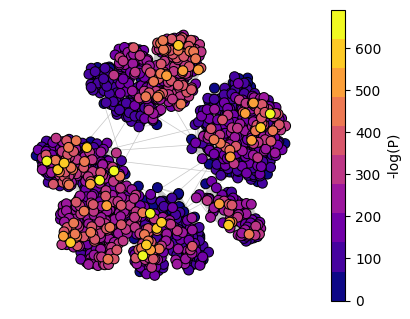

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_63583/2318689195.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_63583/2318689195.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 450x350 with 0 Axes>

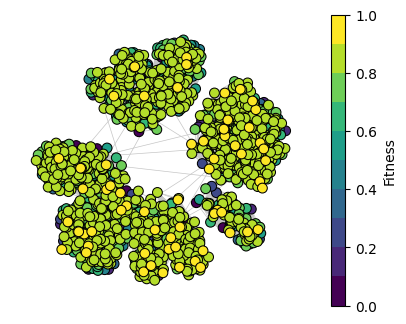

In [117]:
#Ground truth graph

#Local ruggedness values
values = [node[1]['logp'] for node in G_k_full.nodes(data=True)]
viridis = plt.cm.get_cmap('plasma', 10)
pos = nx.spring_layout(G_k_full, k=0.35)

nodes_sorted_by_value = sorted(G_k_full.nodes(data=True), key=lambda x: x[1]['logp'])
node_colors = [viridis((node[1]['logp'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]


plt.figure(figsize=(4.5, 3.5))
fig, ax = plt.subplots(figsize=(4.5, 3.5), constrained_layout=True)
plt.tight_layout()
nx.draw(G_k_full, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=50, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])  # This is needed to avoid a warning
# Add colorbar with label
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('-log(P)')

#plt.savefig('figures/Figure_4/His3p_graph_full_activity.pdf')
plt.savefig('figures/Figure_4/His3p_graph_full_logp.pdf')
plt.show()

#Fitness values
values = [node[1]['value'] for node in G_k_full.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

nodes_sorted_by_value = sorted(G_k_full.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

plt.figure(figsize=(4.5, 3.5))
fig, ax = plt.subplots(figsize=(4.5, 3.5), constrained_layout=True)
plt.tight_layout()
nx.draw(G_k_full, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=50, width=0.5, edge_color='#C6C6C6', linewidths=0.75)

sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])  # This is needed to avoid a warning
# Add colorbar with label
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Fitness')
plt.savefig('figures/Figure_4/His3p_graph_full_activity.pdf')
plt.show()

Computing local Dirichlet energy.: 202it [00:00, 2734.68it/s]
Computing local Dirichlet energy.: 202it [00:00, 3310.77it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:125: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing local Dirichlet energy.: 202it [00:00, 3487.81it/s]
Computing local Dirichlet energy.: 202it [00:00, 3418.92it/s]
Computing local Dirichlet energy.: 202it [00:00, 3501.96it/s]
Computing local Dirichlet energy.: 202it [00:00, 3444.40it/s]
Computing local Dirichlet energy.: 202it [00:00, 3465.37it/s]
Computing local Dirichlet energy.: 202it [00:00, 3348.14it/s]
Computing local Dirichlet energy.: 202it [00:00, 3456.61it/s]
Computing local Dirichlet energy.: 202it [00:00, 3392.17it/s]
Computing pairwise signal differences in Laplacian approximation.: 69it [00:00, 907231.90it/s]
Computing pairwise signal differences in Laplacian approximation.: 66

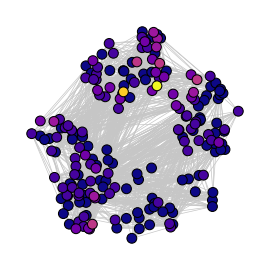

0.2485511767116716 0.00036137997731960995
0.2485511767116716
0.00036137997731960995


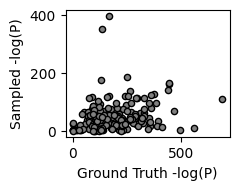

Computing local Dirichlet energy.: 383it [00:00, 1731.60it/s]
Computing local Dirichlet energy.: 383it [00:00, 2101.12it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:125: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing local Dirichlet energy.: 383it [00:00, 2101.87it/s]
Computing local Dirichlet energy.: 383it [00:00, 2101.64it/s]
Computing local Dirichlet energy.: 383it [00:00, 2129.15it/s]
Computing local Dirichlet energy.: 383it [00:00, 1996.58it/s]
Computing local Dirichlet energy.: 383it [00:00, 2079.15it/s]
Computing local Dirichlet energy.: 383it [00:00, 2104.57it/s]
Computing local Dirichlet energy.: 383it [00:00, 2178.85it/s]
Computing local Dirichlet energy.: 383it [00:00, 2184.64it/s]
Computing pairwise signal differences in Laplacian approximation.: 196it [00:00, 1304894.58it/s]
Computing pairwise signal differences in Laplacian approximation.: 

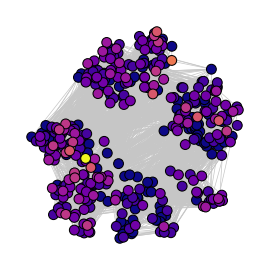

0.4730077713832652 9.533160514527651e-23
0.4730077713832652
9.533160514527651e-23


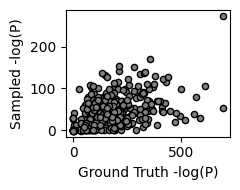

Computing local Dirichlet energy.: 563it [00:00, 1079.08it/s]
Computing local Dirichlet energy.: 563it [00:00, 1289.58it/s]
/Users/matthewspence/Documents/Documents/graph-ruggedness-de/src/brownian_motion.py:125: RuntimeWarning: Mean of empty slice
  avg_neighbor_signal = np.nanmean([G.nodes[neighbor]['value'] for neighbor in neighbors])
Computing local Dirichlet energy.: 563it [00:00, 1480.10it/s]
Computing local Dirichlet energy.: 563it [00:00, 1549.83it/s]
Computing local Dirichlet energy.: 563it [00:00, 1549.52it/s]
Computing local Dirichlet energy.: 563it [00:00, 1220.08it/s]
Computing local Dirichlet energy.: 563it [00:00, 1460.49it/s]
Computing local Dirichlet energy.: 563it [00:00, 1544.55it/s]
Computing local Dirichlet energy.: 563it [00:00, 1551.23it/s]
Computing local Dirichlet energy.: 563it [00:00, 1547.96it/s]
Computing pairwise signal differences in Laplacian approximation.: 169it [00:00, 1261276.47it/s]
Computing pairwise signal differences in Laplacian approximation.: 

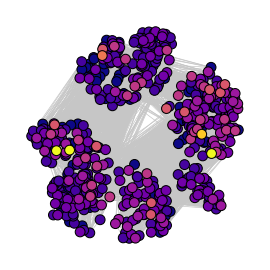

0.4299953426388208 9.676509039275451e-27
0.4299953426388208
9.676509039275451e-27


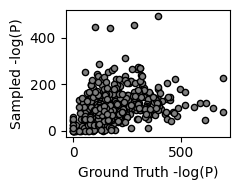

Computing local Dirichlet energy.: 743it [00:00, 1027.61it/s]
Computing local Dirichlet energy.: 743it [00:00, 1160.91it/s]
Computing local Dirichlet energy.: 743it [00:00, 982.24it/s] 
Computing local Dirichlet energy.: 743it [00:00, 1020.14it/s]
Computing local Dirichlet energy.: 743it [00:00, 1168.79it/s]
Computing local Dirichlet energy.: 743it [00:00, 1010.22it/s]
Computing local Dirichlet energy.: 743it [00:00, 1161.18it/s]
Computing local Dirichlet energy.: 743it [00:00, 1021.21it/s]
Computing local Dirichlet energy.: 743it [00:00, 1128.52it/s]
Computing local Dirichlet energy.: 743it [00:00, 1170.35it/s]
Computing pairwise signal differences in Laplacian approximation.: 346it [00:00, 1496112.56it/s]
Computing pairwise signal differences in Laplacian approximation.: 209it [00:00, 1432368.52it/s]
Computing pairwise signal differences in Laplacian approximation.: 294it [00:00, 1564879.92it/s]
Computing pairwise signal differences in Laplacian approximation.: 325it [00:00, 1617021.

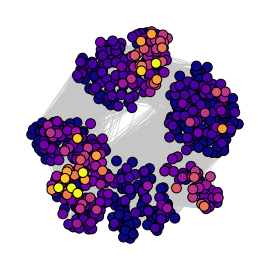

0.49343093920174885 7.517620063464496e-47
0.49343093920174885
7.517620063464496e-47


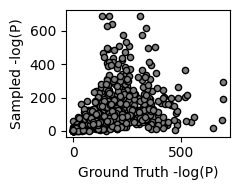

Computing local Dirichlet energy.: 923it [00:01, 819.11it/s]
Computing local Dirichlet energy.: 923it [00:01, 908.88it/s] 
Computing local Dirichlet energy.: 923it [00:01, 831.88it/s]
Computing local Dirichlet energy.: 923it [00:01, 922.16it/s] 
Computing local Dirichlet energy.: 923it [00:01, 826.59it/s] 
Computing local Dirichlet energy.: 923it [00:01, 911.46it/s] 
Computing local Dirichlet energy.: 923it [00:01, 819.13it/s] 
Computing local Dirichlet energy.: 923it [00:01, 837.46it/s]
Computing local Dirichlet energy.: 923it [00:01, 835.30it/s] 
Computing local Dirichlet energy.: 923it [00:01, 819.86it/s]
Computing pairwise signal differences in Laplacian approximation.: 410it [00:00, 1566179.09it/s]
Computing pairwise signal differences in Laplacian approximation.: 299it [00:00, 1557884.34it/s]
Computing pairwise signal differences in Laplacian approximation.: 521it [00:00, 1468570.15it/s]
Computing pairwise signal differences in Laplacian approximation.: 508it [00:00, 1660722.08it

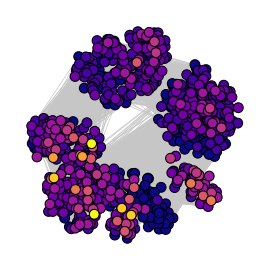

0.5592004811601009 4.736759591855917e-77
0.5592004811601009
4.736759591855917e-77


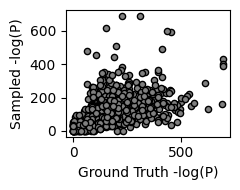

Computing local Dirichlet energy.: 1104it [00:01, 614.18it/s]
Computing local Dirichlet energy.: 1104it [00:01, 692.60it/s]
Computing local Dirichlet energy.: 1104it [00:01, 681.04it/s]
Computing local Dirichlet energy.: 1104it [00:01, 691.80it/s]
Computing local Dirichlet energy.: 1104it [00:01, 676.98it/s]
Computing local Dirichlet energy.: 1104it [00:01, 679.30it/s]
Computing local Dirichlet energy.: 1104it [00:01, 678.19it/s]
Computing local Dirichlet energy.: 1104it [00:01, 658.13it/s]
Computing local Dirichlet energy.: 1104it [00:01, 560.27it/s]
Computing local Dirichlet energy.: 1104it [00:01, 671.38it/s]
Computing pairwise signal differences in Laplacian approximation.: 554it [00:00, 1683800.30it/s]
Computing pairwise signal differences in Laplacian approximation.: 490it [00:00, 1618274.77it/s]
Computing pairwise signal differences in Laplacian approximation.: 460it [00:00, 1649042.60it/s]
Computing pairwise signal differences in Laplacian approximation.: 573it [00:00, 1535678.

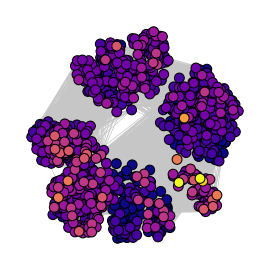

0.45383848424405104 3.4093681414615466e-57
0.45383848424405104
3.4093681414615466e-57


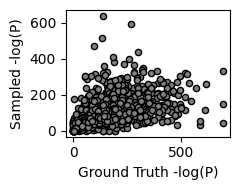

Computing local Dirichlet energy.: 1284it [00:01, 643.09it/s]
Computing local Dirichlet energy.: 1284it [00:02, 615.51it/s]
Computing local Dirichlet energy.: 1284it [00:02, 575.99it/s]
Computing local Dirichlet energy.: 1284it [00:02, 623.45it/s]
Computing local Dirichlet energy.: 1284it [00:02, 640.87it/s]
Computing local Dirichlet energy.: 1284it [00:02, 637.27it/s]
Computing local Dirichlet energy.: 1284it [00:02, 600.07it/s]
Computing local Dirichlet energy.: 1284it [00:02, 641.70it/s]
Computing local Dirichlet energy.: 1284it [00:02, 641.75it/s]
Computing local Dirichlet energy.: 1284it [00:01, 646.60it/s]
Computing pairwise signal differences in Laplacian approximation.: 772it [00:00, 1575670.41it/s]
Computing pairwise signal differences in Laplacian approximation.: 610it [00:00, 1752414.68it/s]
Computing pairwise signal differences in Laplacian approximation.: 680it [00:00, 1730659.42it/s]
Computing pairwise signal differences in Laplacian approximation.: 588it [00:00, 1729488.

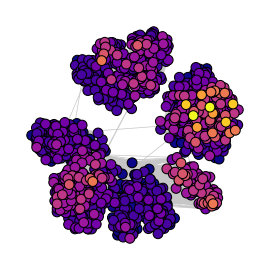

0.5053836436537888 3.4773797249600632e-84
0.5053836436537888
3.4773797249600632e-84


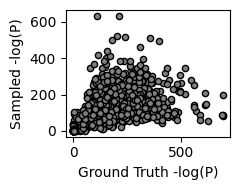

Computing local Dirichlet energy.: 1464it [00:02, 565.66it/s]
Computing local Dirichlet energy.: 1464it [00:02, 531.70it/s]
Computing local Dirichlet energy.: 1464it [00:02, 564.25it/s]
Computing local Dirichlet energy.: 1464it [00:02, 514.46it/s]
Computing local Dirichlet energy.: 1464it [00:02, 549.83it/s]
Computing local Dirichlet energy.: 1464it [00:02, 509.92it/s]
Computing local Dirichlet energy.: 1464it [00:02, 499.88it/s]
Computing local Dirichlet energy.: 1464it [00:02, 520.22it/s]
Computing local Dirichlet energy.: 1464it [00:02, 537.58it/s]
Computing local Dirichlet energy.: 1464it [00:02, 561.83it/s]
Computing pairwise signal differences in Laplacian approximation.: 825it [00:00, 1596079.70it/s]
Computing pairwise signal differences in Laplacian approximation.: 702it [00:00, 1707889.45it/s]
Computing pairwise signal differences in Laplacian approximation.: 685it [00:00, 1700058.13it/s]
Computing pairwise signal differences in Laplacian approximation.: 640it [00:00, 1657008.

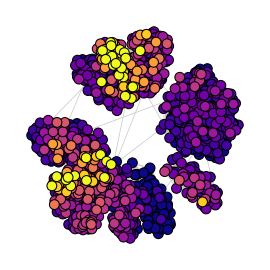

0.6075165009645116 2.081613453127365e-148
0.6075165009645116
2.081613453127365e-148


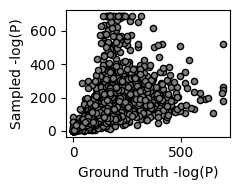

Computing local Dirichlet energy.: 1644it [00:03, 448.60it/s]
Computing local Dirichlet energy.: 1644it [00:03, 467.92it/s]
Computing local Dirichlet energy.: 1644it [00:03, 494.91it/s]
Computing local Dirichlet energy.: 1644it [00:03, 462.10it/s]
Computing local Dirichlet energy.: 1644it [00:03, 472.36it/s]
Computing local Dirichlet energy.: 1644it [00:03, 470.23it/s]
Computing local Dirichlet energy.: 1644it [00:03, 453.14it/s]
Computing local Dirichlet energy.: 1644it [00:03, 452.83it/s]
Computing local Dirichlet energy.: 1644it [00:04, 406.64it/s]
Computing local Dirichlet energy.: 1644it [00:03, 457.73it/s]
Computing pairwise signal differences in Laplacian approximation.: 1096it [00:00, 1652987.12it/s]
Computing pairwise signal differences in Laplacian approximation.: 963it [00:00, 1660137.59it/s]
Computing pairwise signal differences in Laplacian approximation.: 964it [00:00, 1677025.74it/s]
Computing pairwise signal differences in Laplacian approximation.: 921it [00:00, 1760690

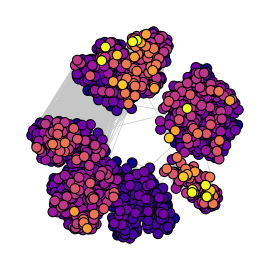

0.5489520184094406 4.921352227224156e-130
0.5489520184094406
4.921352227224156e-130


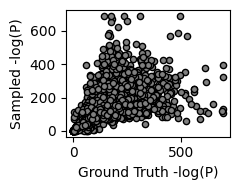

Computing local Dirichlet energy.: 1706it [00:03, 436.51it/s]
Computing local Dirichlet energy.: 1706it [00:03, 431.34it/s]
Computing local Dirichlet energy.: 1706it [00:04, 422.13it/s]
Computing local Dirichlet energy.: 1706it [00:03, 432.20it/s]
Computing local Dirichlet energy.: 1706it [00:03, 439.53it/s]
Computing local Dirichlet energy.: 1706it [00:03, 449.37it/s]
Computing local Dirichlet energy.: 1706it [00:03, 431.07it/s]
Computing local Dirichlet energy.: 1706it [00:03, 438.23it/s]
Computing local Dirichlet energy.: 1706it [00:04, 390.87it/s]
Computing local Dirichlet energy.: 1706it [00:03, 476.43it/s]
Computing pairwise signal differences in Laplacian approximation.: 1132it [00:00, 1696909.27it/s]
Computing pairwise signal differences in Laplacian approximation.: 970it [00:00, 1720285.36it/s]
Computing pairwise signal differences in Laplacian approximation.: 991it [00:00, 1691031.43it/s]
Computing pairwise signal differences in Laplacian approximation.: 925it [00:00, 1546942

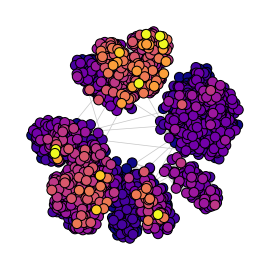

0.59732976246559 1.6544566939207158e-165
0.59732976246559
1.6544566939207158e-165


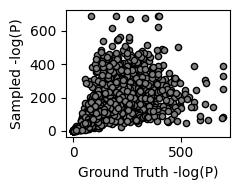

In [118]:
#Sampled graph

#Local ruggedness values

for key in keys:

    G_samp_local_prior_arr = brownian_motion.sample_prior_dist(
    G=graph_sampl_repl_dict[key],
    ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy_approximate,
    replicates=10,
    local=True
    )

    #Compute local Dirichlet energies over the full graph.
    graph_ruggedness_de.compute_local_dirichlet_energy(G=graph_sampl_repl_dict[key],
                                                    approximate=True)


    #Update nodes with -logP value. 
    for node, data in graph_sampl_repl_dict[key].nodes(data=True):
        # Compute the -logP value for the current node
        logp_value = -brownian_motion.compute_log_probability(
            prior_arr=G_samp_local_prior_arr[node], 
            empirical_val=data['local_dirichlet']
        )
    
        # Update the node with the 'logp' attribute
        graph_sampl_repl_dict[key].nodes[node]['logp'] = logp_value

    values = [node[1]['logp'] for node in graph_sampl_repl_dict[key].nodes(data=True)]
    viridis = plt.cm.get_cmap('plasma', 10)

    nodes_sorted_by_value = sorted(graph_sampl_repl_dict[key].nodes(data=True), key=lambda x: x[1]['logp'])
    node_colors = [viridis((node[1]['logp'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
    nodes_sorted = [node[0] for node in nodes_sorted_by_value]

    plt.figure(figsize=(2.5, 2.5))

    nx.draw(graph_sampl_repl_dict[key], pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=50, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
    plt.tight_layout()
    plt.savefig(f'figures/Figure_4/His3p_graph_{key[0]}_activity.pdf')
    plt.show()


    all_nodes = [node for node in graph_sampl_repl_dict[key].nodes()][0]
    G_k_full.nodes[all_nodes]

    x = []
    y = []
    for node in graph_sampl_repl_dict[key].nodes():
        x.append(G_k_full.nodes[node]['logp'])
        y.append(graph_sampl_repl_dict[key].nodes[node]['logp'])
    rho, p_value = spearmanr(x, y)
    print(rho, p_value)

    plt.figure(figsize=(2.5, 2))
    plt.scatter(x=x, y=y, color='grey', edgecolors='black', linewidths=1, s=20)
    print(rho)
    print(p_value)
    #plt.text(0.675, 0.9, f'ρ = {rho:.2f}', transform=plt.gca().transAxes, fontsize=8)
    #plt.text(0.6, 0.825, f'ρ = {p_value:.2f}', transform=plt.gca().transAxes, fontsize=8)
    plt.xlabel('Ground Truth -log(P)')
    plt.ylabel('Sampled -log(P)')
    plt.tight_layout()
    plt.savefig(f'figures/Figure_4/His3p_scatter_{key[0]}logp.pdf')
    plt.show()


In [128]:
logp_dict

{(0.1, 0): array([74.84701761]),
 (0.18888888888888888, 0): array([173.9586201]),
 (0.2777777777777778, 0): array([378.9623411]),
 (0.3666666666666667, 0): array([583.15770088]),
 (0.4555555555555556, 0): array([391.85308932]),
 (0.5444444444444445, 0): array([690.7755279]),
 (0.6333333333333333, 0): array([657.26018727]),
 (0.7222222222222222, 0): array([573.08267132]),
 (0.8111111111111111, 0): array([469.60435304]),
 (0.9, 0): array([546.75864122])}

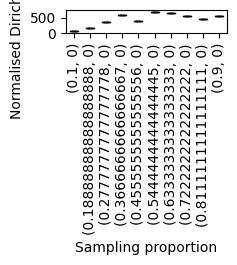

In [129]:
labs = [key for key in logp_dict.keys()]
vals = [logp_dict[key] for key in logp_dict.keys()]

fig, ax = plt.subplots(figsize=(2.5,2.75))
bp = ax.boxplot(vals, labels=[str(label) for label in labs], notch=False, patch_artist=True)

# Set fill colors for each box
color = 'grey'
for box in bp['boxes']:
    box.set_facecolor(color)

# Set median line color
for median in bp['medians']:
    median.set_color('black')
plt.tight_layout()
plt.axhline(-true_logp, color='grey', linestyle='--')
plt.ylabel('Normalised Dirichlet energy')
plt.xlabel('Sampling proportion')
plt.xticks(rotation=90)
plt.ylim(0, 750)
plt.tight_layout()
#plt.savefig('figures/Figure_4/sampling_boxplot.pdf')
plt.show()